In [1]:
# Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset. 
# Determine the number of clusters using the elbow method.
# Dataset link : https://www.kaggle.com/datasets/kyanyoga/sample-sales-data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# from yellowbrick.cluster import KElbowVisualizer

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv('sales_data_sample.csv', sep = ',', encoding = 'Latin-1')

In [4]:
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [5]:
# Prepare the data as needed (feature selection, preprocessing, etc.)

In [6]:
# Step 2: Select relevant features for clustering (e.g., 'QUANTITYORDERED', 'PRICEEACH')
selected_features = data[['QUANTITYORDERED', 'PRICEEACH']]
selected_features

,QUANTITYORDERED,PRICEEACH
0,30,95.70
1,34,81.35
2,41,94.74
3,45,83.26
4,49,100.00
...,...,...
2818,20,100.00
2819,29,100.00
2820,43,100.00
2821,34,62.24


In [7]:
# Step 3: Normalize the data (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_features = scaler.fit_transform(selected_features)

In [8]:
normalized_features

array([[-0.52289086,  0.5969775 ],
       [-0.11220131, -0.11445035],
       [ 0.60650538,  0.54938372],
       ...,
       [ 0.81185016,  0.81015797],
       [-0.11220131, -1.06186404],
       [ 1.2225397 , -0.89925195]])

In [9]:
# Step 4: Determine the optimal number of clusters using the elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(normalized_features)
    wcss.append(kmeans.inertia_)

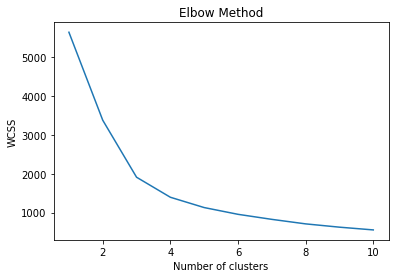

In [10]:
# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
# Step 5: Choose the optimal number of clusters (elbow point) and perform K-Means clustering
optimal_clusters = 3  # Adjust based on the elbow point in the graph
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(normalized_features)

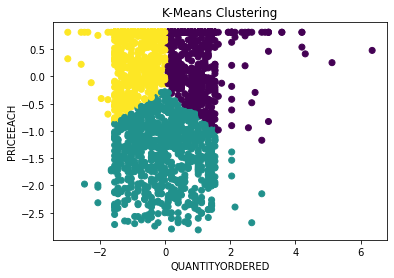

In [12]:
# Step 6: Visualize the clusters (if possible)
plt.scatter(normalized_features[:, 0], normalized_features[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('QUANTITYORDERED')
plt.ylabel('PRICEEACH')
plt.title('K-Means Clustering')
plt.show()